
# Linear Regression Example

This example uses the truck sales dataset to illustrate ordinary least-squares (OLS), or linear regression. The
plot shows the line that linear regression learns, which best minimizes the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation. We also compute the residual sum of squares and the variance score for the model.



y = 0.434585 + 0.851144x
Mean squared error: 0.011812
Variance score: 0.997083


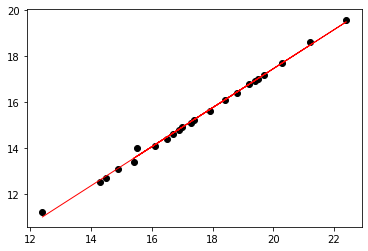

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

# Get data
df = pd.read_csv(
    filepath_or_buffer='data/trucks.csv', 
    header=None)
data = df.iloc[:,:].values
X = data[:,0].reshape(-1, 1)
Y = data[:,1].reshape(-1, 1)

# Train the model using the training sets
regr = linear_model.LinearRegression()
regr.fit(X, Y)
slope = regr.coef_[0]
intercept = regr.intercept_

print("y = %f + %fx" %(intercept, slope))
print("Mean squared error: %f"
      % np.mean((regr.predict(X) - Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %f' % regr.score(X, Y))

# Plot outputs
plt.scatter(X, Y,  color='black')
plt.plot(X, regr.predict(X), color='red',
          linewidth=1)
plt.show()

In the cell below, we load a subset of the Iris dataset from UCI, specifically all the samples for the "Iris Setosa" flower. The function `model` finds the OLS model for a pair of features in the data and computes the residual sum of squares and the variance score for that model. The parameters `regressor` and `response` are the names of the X and Y variables.

In [4]:
import numpy as np
import pandas as pd
from sklearn import linear_model

df = pd.read_csv(
    filepath_or_buffer='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None)
data = df.iloc[:,:].values
data = data[data[:,4] == "Iris-setosa"][:,:4]

def model(X, Y, regressor="X", response="Y"):
    X = X.reshape(-1, 1)
    Y = Y.reshape(-1, 1)
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    slope = regr.coef_[0]
    intercept = regr.intercept_

    print("%s = %f + %f x %s" %(response, intercept, slope, regressor))
    Yp = np.squeeze(regr.predict(X))
    sse = np.sum((Yp - Y) ** 2)
    print("Sum of squared errors: %f" % sse)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %f\n' % regr.score(X, Y))
    return slope, intercept, sse, response, regressor


Exercise
======

The samples have 4 features. For each combination of features (each pair or features), consider one of the variables as predictor and the other as response and use the function `model` to find the OLS model that best fits the data. Report the model with the smallest SSE score.

In [5]:
names = ['slength', 'swidth', 'plength', 'pwidth']
# results = []
# for i in range(4):
#     for j in range(4):
#         if i != j:
#             print(i, j)
#             results.append( model(data[:,i], data[:,j], names[i], names[j]) )
results = [ model(data[:,i], data[:,j], names[i], names[j])  for i in range(4) for j in range(4) if i != j ]
best = sorted(results, key=lambda x: x[2])
best[0]

swidth = -0.623012 + 0.807234 x slength
Sum of squared errors: 554.051529
Variance score: 0.557681

plength = 0.813768 + 0.129891 x slength
Sum of squared errors: 78.895875
Variance score: 0.069630

pwidth = -0.180937 + 0.084886 x slength
Sum of squared errors: 30.353442
Variance score: 0.077892

slength = 2.644660 + 0.690854 x swidth
Sum of squared errors: 474.173651
Variance score: 0.557681

plength = 1.188976 + 0.080463 x swidth
Sum of squared errors: 76.062860
Variance score: 0.031221

pwidth = -0.025258 + 0.078776 x swidth
Sum of squared errors: 30.367316
Variance score: 0.078385

slength = 4.221204 + 0.536063 x plength
Sum of squared errors: 325.605927
Variance score: 0.069630

swidth = 2.849946 + 0.388015 x plength
Sum of squared errors: 366.794995
Variance score: 0.031221

pwidth = -0.033080 + 0.189262 x plength
Sum of squared errors: 30.802104
Variance score: 0.093825

slength = 4.782102 + 0.917614 x pwidth
Sum of squared errors: 328.121136
Variance score: 0.077892

swidth = 3

(array([0.08488552]),
 array([-0.18093689]),
 30.353441739758498,
 'pwidth',
 'slength')